In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist , cifar10

from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [15]:
(X_train_data,Y_train_data),(X_test_data,Y_test_data) = mnist.load_data()

## Preparation de donnée

In [22]:
X_train = X_train_data.reshape(60000,28,28,1)
X_test = X_test_data.reshape(10000,28,28,1)
X_train = X_train/255
X_test = X_test/255

Y_train = to_categorical(Y_train_data,num_classes=10)
Y_test = to_categorical(Y_test_data,num_classes=10)

In [23]:
X_train_data.shape

(60000, 28, 28)

In [24]:
model = Sequential()

# Première couche de convolution
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1),padding='same', activation='relu'))

# Deuxième couche de convolution
model.add(Conv2D(16,kernel_size=(3,3) ,padding='same', activation='relu'))

# Couche de flattening
model.add(Flatten())

# couche de sortie
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

e:\Data\script\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │       125,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,394 (509.35 KB)

 Trainable params: 130,394 (509.35 KB)

 Non-trainable params: 0 (0.00 B)

None


In [25]:
model.fit(X_train, Y_train, epochs=20, batch_size=32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - accuracy: 0.9525 - loss: 0.1574
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9826 - loss: 0.0577
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 0.9876 - loss: 0.0407
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9906 - loss: 0.0292
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9934 - loss: 0.0205
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9948 - loss: 0.0159
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.9954 - loss: 0.0136
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9968 - loss: 0.0091
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9979 - loss: 0.0067
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9977 - loss: 0.0064
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9983 - loss: 0.0056
Epoch 12

In [15]:
def model_performance(prediction, Y_test):
    true = 0
    false = 0
    for (i,j) in zip(prediction, Y_test):
        if np.argmax(i) == j:
            true += 1
        else:
            false += 1
    print("Nombre de prédictions vraies : " + str(true))
    print("Nombre de prédictions fausses : " + str(false))
    print("Taux de réussite : " + str(true*100 / (true + false)) + " %")

In [28]:
prediction = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


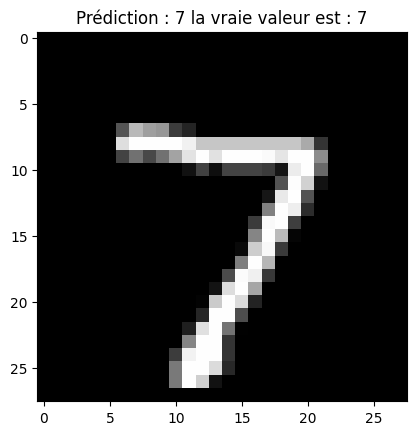

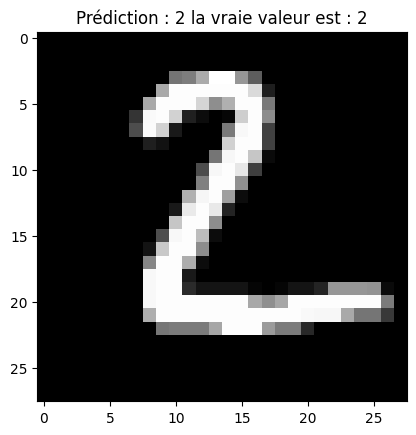

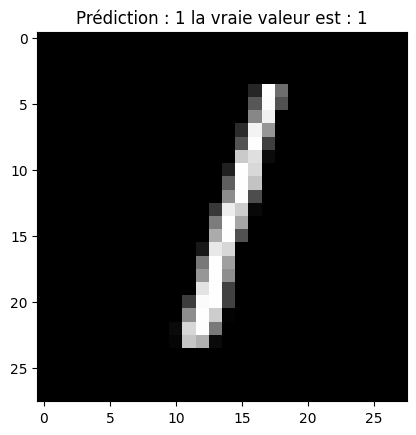

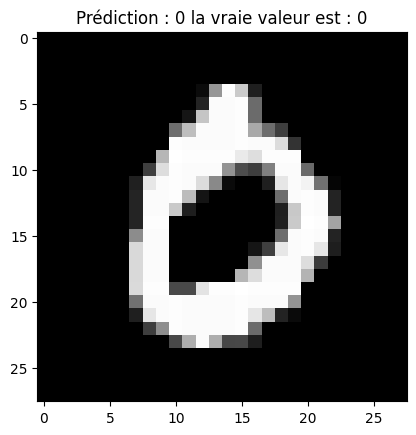

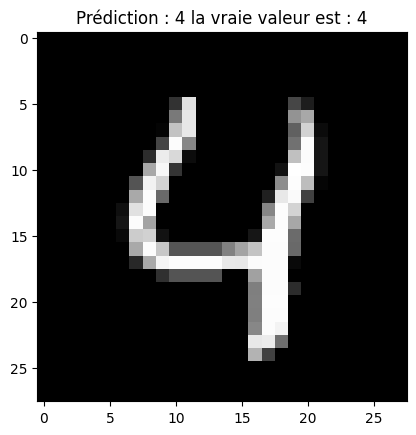

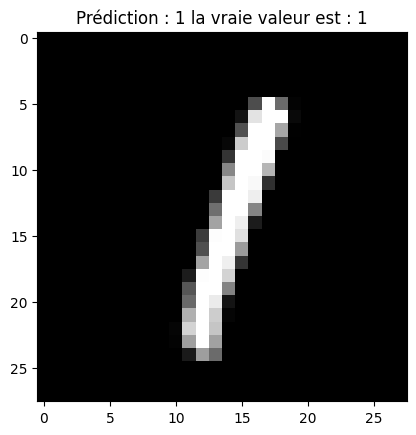

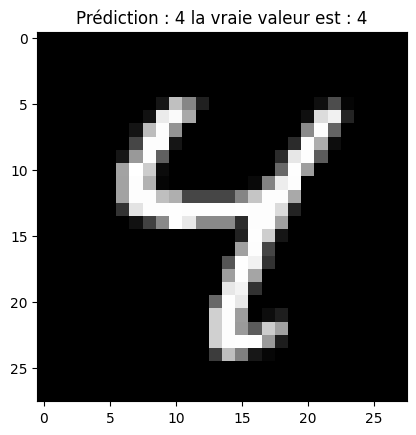

In [31]:
for i in range(7):
    plt.imshow(X_test[i],cmap='gray')
    plt.title("Prédiction : " + str(np.argmax(prediction[i])) + " la vraie valeur est : " + str(Y_test_data[i]))
    plt.show()

In [32]:
model_performance(prediction, Y_test_data)

Nombre de prédictions vraies : 9868
Nombre de prédictions fausses : 132
Taux de réussite : 98.68 %


# Reconnaissance d'image

In [3]:
(X_train_data_2,Y_train_data_2),(X_test_data_2,Y_test_data_2) = cifar10.load_data()

## Dimension

In [4]:
X_train_data_2.shape

(50000, 32, 32, 3)

## Normalisation

In [6]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

X_train_2 = X_train_data_2/255
X_test_2 = X_test_data_2/255

Y_train_2 = to_categorical(Y_train_data_2,num_classes=10)
Y_test_2 = to_categorical(Y_test_data_2,num_classes=10)

## Preparation du reseau de neronne convolutif

In [12]:
model_2 = Sequential()

# Premier couche  de convolution
model_2.add(Conv2D(64,kernel_size=(3,3) ,input_shape=(32,32,3),padding='same',activation='relu'))

# Deuxième couche de convolution
model_2.add(Conv2D(64,kernel_size=(3,3) ,padding='same',activation='relu'))

# Couche de pooling
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Troisième couche de convolution
model_2.add(Conv2D(64,kernel_size=(3,3) ,padding='same',activation='relu'))

# Quatrième couche de convolution
model_2.add(Conv2D(64,kernel_size=(3,3) ,padding='same',activation='relu'))


# Couche de pooling
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Couche de flattening
model_2.add(Flatten())

# Couche de sortie
model_2.add(Dense(10, activation='softmax'))

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model_2.summary())

e:\Data\script\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153,546 (599.79 KB)

 Trainable params: 153,546 (599.79 KB)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
model_2.fit(X_train_2, Y_train_2, epochs=10, batch_size=32)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 254s 156ms/step - accuracy: 0.7087 - loss: 0.8368
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 239s 153ms/step - accuracy: 0.7551 - loss: 0.7084
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 298s 175ms/step - accuracy: 0.7854 - loss: 0.6163
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 254s 162ms/step - accuracy: 0.8088 - loss: 0.5449
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 238s 152ms/step - accuracy: 0.8312 - loss: 0.4804
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 244s 156ms/step - accuracy: 0.8507 - loss: 0.4276
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 229s 146ms/step - accuracy: 0.8670 - loss: 0.3764
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 281s 180ms/step - accuracy: 0.8809 - loss: 0.3341
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 225s 144ms/step - accuracy: 0.8936 - loss: 0.2977
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 241s 154ms/step - accuracy: 0.9063 - loss: 0.2636


In [16]:
prediction = model_2.predict(X_test_2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step


In [17]:
model_performance(prediction, Y_test_data)

Nombre de prédictions vraies : 7371
Nombre de prédictions fausses : 2629
Taux de réussite : 73.71 %
